In [1]:
import os
import csv
import matplotlib.pyplot as plt
import math

In [2]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

In [3]:
def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

In [4]:
times_list, vys_list, density_list = load_files('result_T', 'T', 2000)

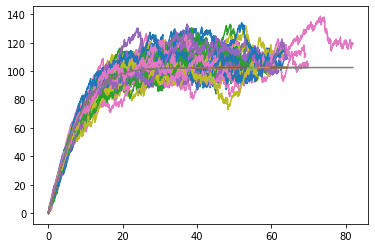

In [5]:
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys)
#     plt.plot(times, calc_first_order(0.085, 10, times))
    plt.plot(times, calc_second_order(0.00095, 10, times)) 

In [6]:
# How to determining terminal velocity
terminal_vs = []
for times, vys in zip (times_list, vys_list) :
    terminal_vs.append(sum(vys[-500:])/500)
terminal_v = sum(terminal_vs)/len(terminal_vs)

In [7]:
# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [8]:
g = 10
gamma_1 = get_gamma_by_first_order(g, terminal_v)
gamma_2 = get_gamma_by_second_order(g, terminal_v)
print("damping factor gamma in the first order situation : {}".format(gamma_1))
print("damping factor gamma in the second order situation : {}".format(gamma_2))

damping factor gamma in the first order situation : 0.09414853832327284
damping factor gamma in the second order situation : 0.0008863947268408775


Text(0, 0.5, 'average velocity (m/s)')

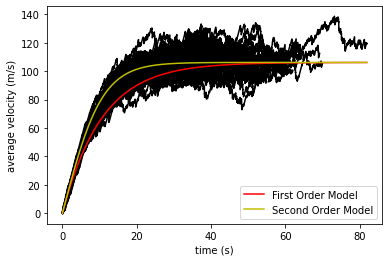

In [27]:
longest_times = []
for times, vys in zip(times_list, vys_list) :
    plt.plot(times, vys, 'k')
    if len(longest_times) < len(times) :
        longest_times = times
plt.plot(longest_times, calc_first_order(gamma_1, g, longest_times), 'r-', label='First Order Model')
plt.plot(longest_times, calc_second_order(gamma_2, g, longest_times), 'y-', label='Second Order Model')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("average velocity (m/s)")

In [10]:
import numpy as np
sqrt_error_first_order = 0.0
sqrt_error_second_order = 0.0
for times, vys in zip(times_list, vys_list) :    
    sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
    sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 
    
print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
if sqrt_error_first_order < sqrt_error_second_order :
    print("The first order model is more fitter than the second order model")
else :
    print("The second order model is more fitter than the first order model")

The Mean Square Root Error of First Order Model : 9.01389658180887
The Mean Square Root Error of Second Order Model : 7.437686354200012
The second order model is more fitter than the first order model


# Organized Script

In [11]:
def calc_first_order(a, g, x) :
    return list(g/a*(1- math.exp(-1*a*t)) for t in x)

def calc_second_order(a, g, x) :
    return list(math.sqrt(g/a)*math.tanh(math.sqrt(a*g)*t) for t in x)

def load_files(dir_name, variance=None, value=None) :
    times_list = []
    vys_list = []
    density_list = []

    files = os.listdir(dir_name)

    if variance and value :
        if variance == "MR" :
            files = list(filter( lambda x : float(x.split('_')[6])==float(value), files))
        elif variance == "T" :
            files = list(filter( lambda x : float(x.split('_')[4])==float(value), files))
        elif variance == "RR" :
            files = list(filter( lambda x : float(x.split('_')[5])==float(value), files))

    for file_name in files :
        with open(dir_name+'/'+file_name) as csvfile:
            times = []
            vys = []
            density = []
            spamreader = csv.reader(csvfile, delimiter=';')
            for i, row in enumerate(spamreader):
                if i > 0 and len(row) == 3:
                    try :
                        temp_t, temp_vy, temp_density = list(map(lambda x : float(x), row))
                        times.append(temp_t)
                        vys.append(temp_vy)
                        density.append(temp_density)
                    except :
                        print ("error", i, row)
            times_list.append(times)
            vys_list.append(vys)
            density_list.append(density)
    
    return times_list, vys_list, density_list

# How to set the determining 
def get_gamma_by_first_order(g, terminal_v) :
    return g/terminal_v

def get_gamma_by_second_order(g, terminal_v) :
    return g/(terminal_v**2)

In [12]:
def compare_models(dir_name, variable, value) :

    times_list, vys_list, density_list = load_files(dir_name, variable, value)
    
    terminal_vs = []
    for times, vys in zip (times_list, vys_list) :
        terminal_vs.append(sum(vys[-500:])/500)
    terminal_v = sum(terminal_vs)/len(terminal_vs)

    g = 10
    gamma_1 = get_gamma_by_first_order(g, terminal_v)
    gamma_2 = get_gamma_by_second_order(g, terminal_v)
    print("damping factor gamma in the first order situation : {}".format(gamma_1))
    print("damping factor gamma in the second order situation : {}".format(gamma_2))

    sqrt_error_first_order = 0.0
    sqrt_error_second_order = 0.0
    for times, vys in zip(times_list, vys_list) :    
        if (len(times) > 0 ) :
            sqrt_error_first_order += np.sqrt(sum((np.array(vys) - np.array(calc_first_order(gamma_1, g, times)))**2)/len(times))
            sqrt_error_second_order += np.sqrt(sum((np.array(vys) - np.array(calc_second_order(gamma_2, g, times)))**2)/len(times)) 

    print("The Mean Square Root Error of First Order Model : {}".format(sqrt_error_first_order/len(vys_list)))
    print("The Mean Square Root Error of Second Order Model : {}".format(sqrt_error_second_order/len(vys_list)))
    if sqrt_error_first_order < sqrt_error_second_order :
        print("The first order model is more fitter than the second order model")
    else :
        print("The second order model is more fitter than the first order model")
times_list, vys_list, density_list = load_files('result_T', 'T', 2000)

In [13]:
Ts = list(range(500, 5000, 500))
for T in Ts :
    print(T)
    compare_models('result_T', 'T', T)

500
damping factor gamma in the first order situation : 0.0861631869843563
damping factor gamma in the second order situation : 0.0007424094791301145
The Mean Square Root Error of First Order Model : 10.614456956194264
The Mean Square Root Error of Second Order Model : 6.492053655785883
The second order model is more fitter than the first order model
1000
damping factor gamma in the first order situation : 0.08812839954402972
damping factor gamma in the second order situation : 0.0007766614806192137
The Mean Square Root Error of First Order Model : 9.881492046977845
The Mean Square Root Error of Second Order Model : 6.621274213464368
The second order model is more fitter than the first order model
1500
damping factor gamma in the first order situation : 0.09428241597724893
damping factor gamma in the second order situation : 0.0008889173962507005
The Mean Square Root Error of First Order Model : 9.375584798444462
The Mean Square Root Error of Second Order Model : 6.624162909898772
The 

In [14]:
RRs = list(map(lambda x : x/10, range(1, 10)))
for RR in RRs :
    print(RR)
    compare_models('result_RR', 'RR', RR)

0.1
damping factor gamma in the first order situation : 0.08891779667397523
damping factor gamma in the second order situation : 0.0007906374565354399
The Mean Square Root Error of First Order Model : 9.579589542152782
The Mean Square Root Error of Second Order Model : 6.8920006944250565
The second order model is more fitter than the first order model
0.2
damping factor gamma in the first order situation : 0.08809510597418836
damping factor gamma in the second order situation : 0.0007760747696603478
The Mean Square Root Error of First Order Model : 9.023274871154664
The Mean Square Root Error of Second Order Model : 6.711568209351375
The second order model is more fitter than the first order model
0.3
damping factor gamma in the first order situation : 0.08881026603071918
damping factor gamma in the second order situation : 0.0007887263352447112
The Mean Square Root Error of First Order Model : 9.72166315473839
The Mean Square Root Error of Second Order Model : 6.6479736046752205
The s

In [15]:
MRs = list(map(lambda x : x/100, range(1, 100, 10)))
for MR in MRs :
    print(MR)
    compare_models('result_MR', 'MR', MR)

0.01
damping factor gamma in the first order situation : 0.08761590876468643
damping factor gamma in the second order situation : 0.0007676547468661856
The Mean Square Root Error of First Order Model : 9.179009013191893
The Mean Square Root Error of Second Order Model : 7.052846236517692
The second order model is more fitter than the first order model
0.11
damping factor gamma in the first order situation : 0.285807707838334
damping factor gamma in the second order situation : 0.008168604585980248
The Mean Square Root Error of First Order Model : 7.989087225142041
The Mean Square Root Error of Second Order Model : 7.821110356631271
The second order model is more fitter than the first order model
0.21
damping factor gamma in the first order situation : 0.4010570893295826
damping factor gamma in the second order situation : 0.016084678890151683
The Mean Square Root Error of First Order Model : 8.13494483454975
The Mean Square Root Error of Second Order Model : 8.082910066701954
The secon